<a href="https://colab.research.google.com/github/buck06191/prototyping-notebooks/blob/main/pca_poc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of NIRS Spectral Data using PCA

Based on <https://learnche.org/pid/latent-variable-modelling/principal-component-analysis/pca-example-analysis-of-spectral-data>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn.preprocessing as pre
import seaborn as sb
import numpy as np

In [ ]:
PATH = '/content/drive/MyDrive/test_data/raw_sensor_7.csv'
df = pd.read_csv(PATH)

In [ ]:
ndim = 4
pca = PCA(ndim)

In [ ]:
def get_R2(df, a):
    # Get and scale data
    signals = df.drop(['Artefact', 'Subject'], axis=1)
    X = pre.scale(signals.values)

    X2 = X * X

    # Get PCA stuff
    T = pca.fit_transform(X)
    P = pca.components_.T

    # Calc R^2 per wavelength 
    T_1 = T[:,:a].reshape([T.shape[0], a]) * -1
    P_1 = P[:,:a].reshape([P.shape[0], a]) * -1
    X_hat = np.matmul(T_1, P_1.T)
    X_hat_2 = X_hat * X_hat
    return np.sum(X_hat_2, axis=0) / np.sum(X2, axis=0)

In [ ]:
R2 = [get_R2(df, a + 1) for a in range(ndim)]

R2_df = pd.DataFrame(R2, columns = df.columns[:-2], index=['R2_{:d}'.format(a + 1) for a in range(ndim)])

In [ ]:
def plot_R2(R2_df):
    axes = R2_df.T.plot(subplots=True, sharey=True, sharex=True, figsize=(15,9))
    axes[1].set_ylabel('R^2 per component (wavelength)')
    plt.xlabel('Wavelength (nm)')

    combo = R2_df.T.plot(figsize=(15,15))
    combo.set_xlabel('Wavelength (nm)')


    return [axes, combo]

[array([<Axes: >, <Axes: ylabel='R^2 per component (wavelength)'>,
        <Axes: >, <Axes: xlabel='Wavelength (nm)'>], dtype=object),
 <Axes: xlabel='Wavelength (nm)'>]

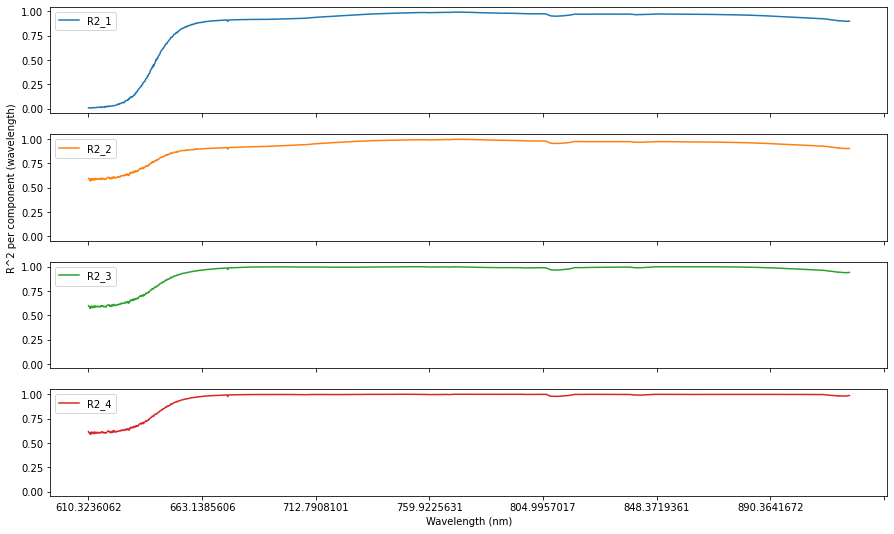

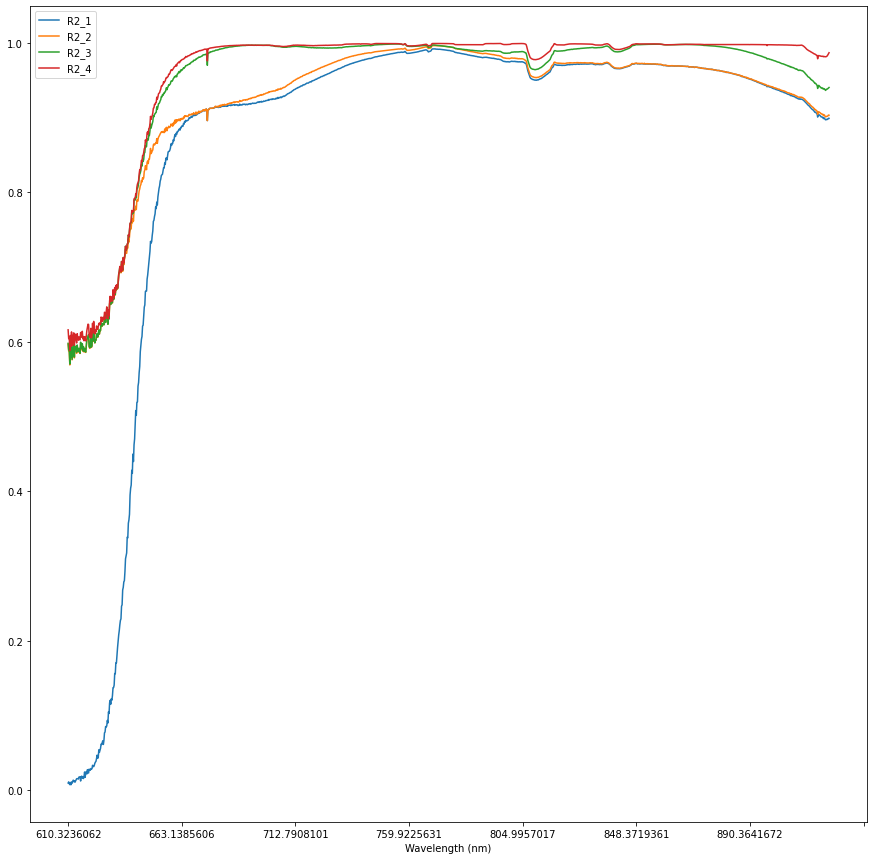

In [ ]:
plot_R2(R2_df)

In [ ]:
control = df.loc[df['Artefact'] == 0]
light = df.loc[df['Artefact'].isin([5,6])]


[array([<Axes: >, <Axes: ylabel='R^2 per component (wavelength)'>,
        <Axes: >, <Axes: xlabel='Wavelength (nm)'>], dtype=object),
 <Axes: xlabel='Wavelength (nm)'>]

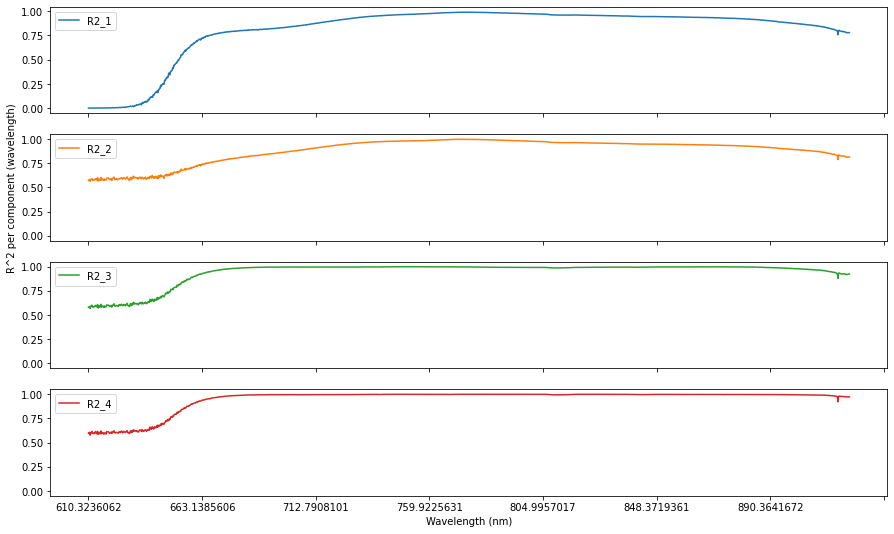

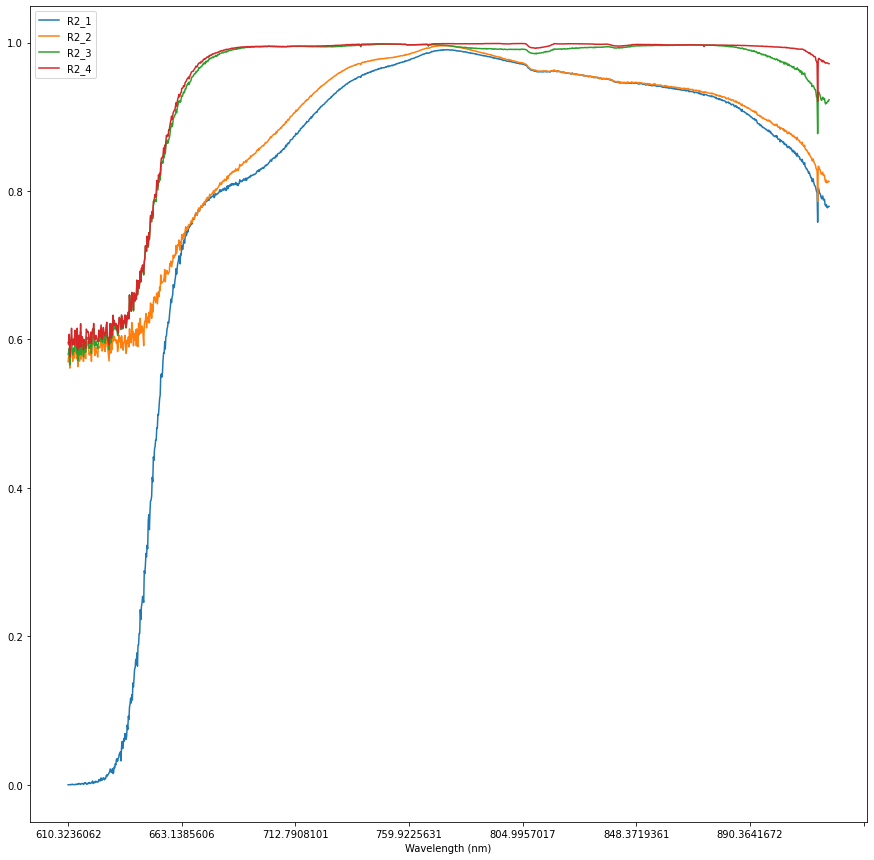

In [ ]:
R2_control = [get_R2(control, a + 1) for a in range(ndim)]

R2_df_c = pd.DataFrame(R2_control, columns = df.columns[:-2], index=['R2_{:d}'.format(a + 1) for a in range(ndim)])

plot_R2(R2_df_c)

[array([<Axes: >, <Axes: ylabel='R^2 per component (wavelength)'>,
        <Axes: >, <Axes: xlabel='Wavelength (nm)'>], dtype=object),
 <Axes: xlabel='Wavelength (nm)'>]

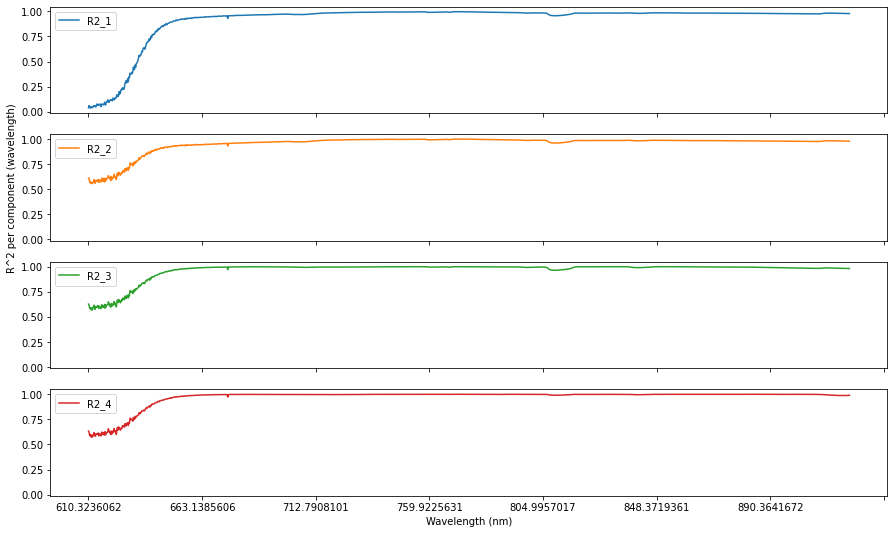

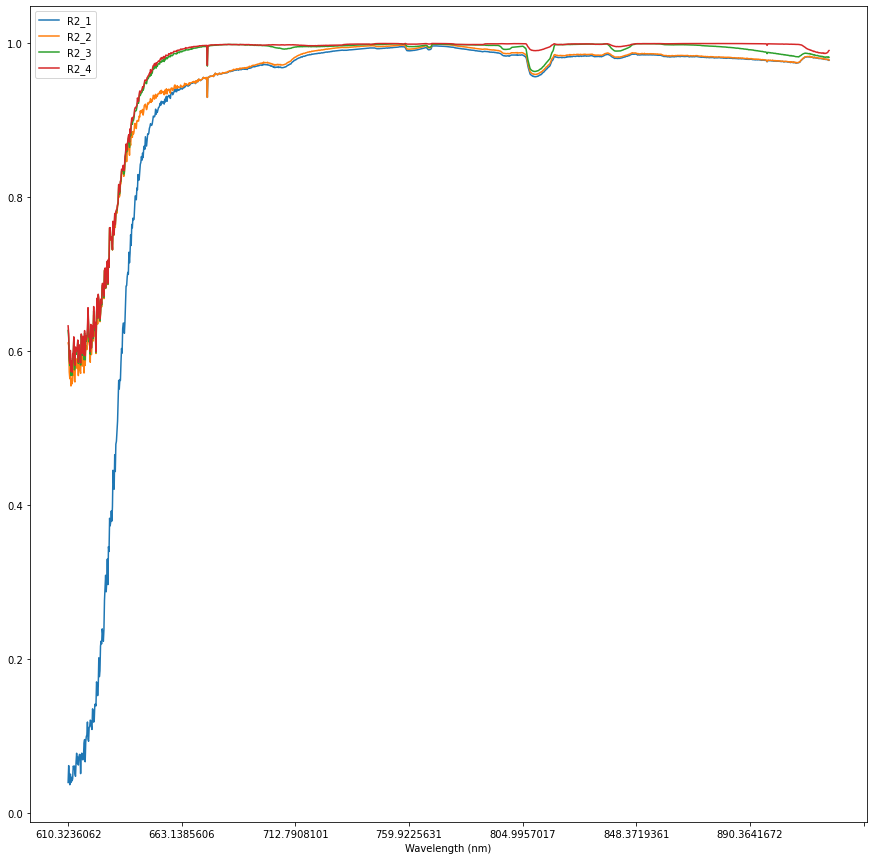

In [ ]:
R2_light = [get_R2(light, a + 1) for a in range(ndim)]

R2_df_l = pd.DataFrame(R2_light, columns = df.columns[:-2], index=['R2_{:d}'.format(a + 1) for a in range(ndim)])

plot_R2(R2_df_l)